# Springboard Regression Case Study - The Red Wine Dataset - Tier 3

Welcome to the Springboard Regression case study! Please note: this is ***Tier 3*** of the case study.

This case study was designed for you to **use Python to apply the knowledge you've acquired in reading *The Art of Statistics* (hereinafter *AoS*) by Professor Spiegelhalter**. Specifically, the case study will get you doing regression analysis; a method discussed in Chapter 5 on p.121. It might be useful to have the book open at that page when doing the case study to remind you of what it is we're up to (but bear in mind that other statistical concepts, such as training and testing, will be applied, so you might have to glance at other chapters too).  

The aim is to ***use exploratory data analysis (EDA) and regression to predict alcohol levels in wine with a model that's as accurate as possible***. 

We'll try a *univariate* analysis (one involving a single explanatory variable) as well as a *multivariate* one (involving multiple explanatory variables), and we'll iterate together towards a decent model by the end of the notebook. The main thing is for you to see how regression analysis looks in Python and jupyter, and to get some practice implementing this analysis.

Throughout this case study, **questions** will be asked in the markdown cells. Try to **answer these yourself in a simple text file** when they come up. Most of the time, the answers will become clear as you progress through the notebook. Some of the answers may require a little research with Google and other basic resources available to every data scientist. 

For this notebook, we're going to use the red wine dataset, wineQualityReds.csv. Make sure it's downloaded and sitting in your working directory. This is a very common dataset for practicing regression analysis and is actually freely available on Kaggle, [here](https://www.kaggle.com/piyushgoyal443/red-wine-dataset).

You're pretty familiar with the data science pipeline at this point. This project will have the following structure: 
**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data
- Choosing a dependent variable
 
**2. Cleaning, transforming, and visualizing**
- Visualizing correlations
  
  
**3. Modeling** 
- Train/Test split
- Making a Linear regression model: your first model
- Making a Linear regression model: your second model: Ordinary Least Squares (OLS) 
- Making a Linear regression model: your third model: multiple linear regression
- Making a Linear regression model: your fourth model: avoiding redundancy

**4. Evaluating and concluding** 
- Reflection 
- Which model was best?
- Other regression algorithms

### 1. Sourcing and loading

#### 1a. Import relevant libraries 

In [1]:
import warnings # For handling error messages.
warnings.filterwarnings('ignore')

In [2]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # estimations of statistical models
from statsmodels.graphics.api import abline_plot # p;lot a line given an intercept and a slope
from sklearn.metrics import mean_squared_error, r2_score # metric for scoring models
from sklearn.model_selection import train_test_split #  split data into training and testing sets
from sklearn import linear_model, preprocessing # module for linear models and preprocessing data

# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
plt.rcParams["axes.labelcolor"] = "#424242"
plt.rcParams["axes.titlecolor"] = "#424242"
plt.rcParams["xtick.labelcolor"] = "#424242"
plt.rcParams["ytick.labelcolor"] = "#424242"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.titlepad"] = 10

#### 1b. Load the data

In [4]:
# Load the data. 
data_path = "../../data/wineQualityReds.csv"
data = pd.read_csv(data_path)

#### 1c. Exploring the data

In [5]:
# Check out its appearance. 
data.sample(5)

Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  \
1086        1087            8.5              0.34         0.40   
994          995           10.0              0.35         0.45   
1171        1172            7.1              0.59         0.00   
1010        1011            8.9              0.28         0.45   
97            98            7.0              0.50         0.25   

      residual.sugar  chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
1086             4.7      0.055                  3.0                   9.0   
994              2.5      0.092                 20.0                  88.0   
1171             2.2      0.078                 26.0                  44.0   
1010             1.7      0.067                  7.0                  12.0   
97               2.0      0.070                  3.0                  22.0   

      density    pH  sulphates  alcohol  quality  
1086  0.99738  3.38       0.66     11.6        7  
994   0.99918  3.15       0.43      9.4        5  
1171  0.99522  3.42       0.68     10.8        6  
1010  0.99354  3.25       0.55     12.3        7  
97    0.99630  3.25       0.63      9.2        5

In [6]:
# Another very useful method to call on a recently imported dataset is .info(). Call it here to get a good
# overview of the data
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


count        mean         std      min       25%  \
Unnamed: 0            1599.0  800.000000  461.735855  1.00000  400.5000   
fixed.acidity         1599.0    8.319637    1.741096  4.60000    7.1000   
volatile.acidity      1599.0    0.527821    0.179060  0.12000    0.3900   
citric.acid           1599.0    0.270976    0.194801  0.00000    0.0900   
residual.sugar        1599.0    2.538806    1.409928  0.90000    1.9000   
chlorides             1599.0    0.087467    0.047065  0.01200    0.0700   
free.sulfur.dioxide   1599.0   15.874922   10.460157  1.00000    7.0000   
total.sulfur.dioxide  1599.0   46.467792   32.895324  6.00000   22.0000   
density               1599.0    0.996747    0.001887  0.99007    0.9956   
pH                    1599.0    3.311113    0.154386  2.74000    3.2100   
sulphates             1599.0    0.658149    0.169507  0.33000    0.5500   
alcohol               1599.0   10.422983    1.065668  8.40000    9.5000   
quality               1599.0    5.636023    0.807569  3.00000    5.0000   

                            50%          75%         max  
Unnamed: 0            800.00000  1199.500000  1599.00000  
fixed.acidity           7.90000     9.200000    15.90000  
volatile.acidity        0.52000     0.640000     1.58000  
citric.acid             0.26000     0.420000     1.00000  
residual.sugar          2.20000     2.600000    15.50000  
chlorides               0.07900     0.090000     0.61100  
free.sulfur.dioxide    14.00000    21.000000    72.00000  
total.sulfur.dioxide   38.00000    62.000000   289.00000  
density                 0.99675     0.997835     1.00369  
pH                      3.31000     3.400000     4.01000  
sulphates               0.62000     0.730000     2.00000  
alcohol                10.20000    11.100000    14.90000  
quality                 6.00000     6.000000     8.00000

What can you infer about the nature of these variables, as output by the info() method?

Which variables might be suitable for regression analysis, and why? For those variables that aren't suitable for regression analysis, is there another type of statistical modeling for which they are suitable?

In [7]:
# We should also look more closely at the dimensions of the dataset. 
data.shape

(1599, 13)

#### 1d. Choosing a dependent variable

We now need to pick a dependent variable for our regression analysis: a variable whose values we will predict. 

'Quality' seems to be as good a candidate as any. Let's check it out. One of the quickest and most informative ways to understand a variable is to make a histogram of it. This gives us an idea of both the center and spread of its values. 

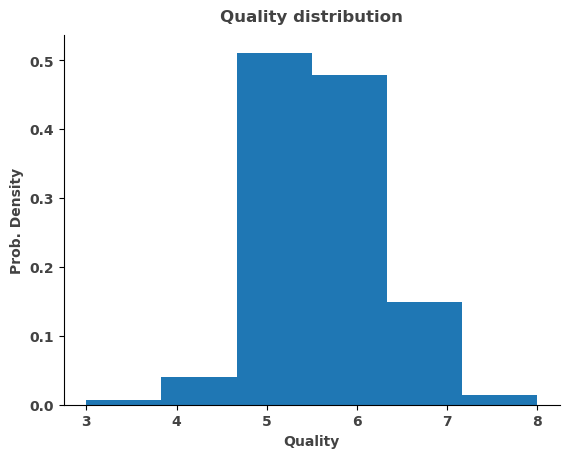

In [8]:
# Making a histogram of the quality variable.
plt.hist(data['quality'],bins = 6, density=True)
plt.xlabel('Quality')
plt.ylabel('Prob. Density')
plt.title('Quality distribution')
plt.show()

We can see so much about the quality variable just from this simple visualization. Answer yourself: what value do most wines have for quality? What is the minimum quality value below, and the maximum quality value? What is the range? Remind yourself of these summary statistical concepts by looking at p.49 of the *AoS*.

But can you think of a problem with making this variable the dependent variable of regression analysis? Remember the example in *AoS* on p.122 of predicting the heights of children from the heights of parents? Take a moment here to think about potential problems before reading on. 

The issue is this: quality is a *discrete* variable, in that its values are integers (whole numbers) rather than floating point numbers. Thus, quality is not a *continuous* variable. But this means that it's actually not the best target for regression analysis. 

Before we dismiss the quality variable, however, let's verify that it is indeed a discrete variable with some further exploration. 

In [9]:
# Get a basic statistical summary of the variable 
data.describe().T

# What do you notice from this summary? 

count        mean         std      min       25%  \
Unnamed: 0            1599.0  800.000000  461.735855  1.00000  400.5000   
fixed.acidity         1599.0    8.319637    1.741096  4.60000    7.1000   
volatile.acidity      1599.0    0.527821    0.179060  0.12000    0.3900   
citric.acid           1599.0    0.270976    0.194801  0.00000    0.0900   
residual.sugar        1599.0    2.538806    1.409928  0.90000    1.9000   
chlorides             1599.0    0.087467    0.047065  0.01200    0.0700   
free.sulfur.dioxide   1599.0   15.874922   10.460157  1.00000    7.0000   
total.sulfur.dioxide  1599.0   46.467792   32.895324  6.00000   22.0000   
density               1599.0    0.996747    0.001887  0.99007    0.9956   
pH                    1599.0    3.311113    0.154386  2.74000    3.2100   
sulphates             1599.0    0.658149    0.169507  0.33000    0.5500   
alcohol               1599.0   10.422983    1.065668  8.40000    9.5000   
quality               1599.0    5.636023    0.807569  3.00000    5.0000   

                            50%          75%         max  
Unnamed: 0            800.00000  1199.500000  1599.00000  
fixed.acidity           7.90000     9.200000    15.90000  
volatile.acidity        0.52000     0.640000     1.58000  
citric.acid             0.26000     0.420000     1.00000  
residual.sugar          2.20000     2.600000    15.50000  
chlorides               0.07900     0.090000     0.61100  
free.sulfur.dioxide    14.00000    21.000000    72.00000  
total.sulfur.dioxide   38.00000    62.000000   289.00000  
density                 0.99675     0.997835     1.00369  
pH                      3.31000     3.400000     4.01000  
sulphates               0.62000     0.730000     2.00000  
alcohol                10.20000    11.100000    14.90000  
quality                 6.00000     6.000000     8.00000

In [10]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
data['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

The outputs of the describe() and value_counts() methods are consistent with our histogram, and since there are just as many values as there are rows in the dataset, we can infer that there are no NAs for the quality variable. 

But scroll up again to when we called info() on our wine dataset. We could have seen there, already, that the quality variable had int64 as its type. As a result, we had sufficient information, already, to know that the quality variable was not appropriate for regression analysis. Did you figure this out yourself? If so, kudos to you!

The quality variable would, however, conduce to proper classification analysis. This is because, while the values for the quality variable are numeric, those numeric discrete values represent *categories*; and the prediction of category-placement is most often best done by classification algorithms. You saw the decision tree output by running a classification algorithm on the Titanic dataset on p.168 of Chapter 6 of *AoS*. For now, we'll continue with our regression analysis, and continue our search for a suitable dependent variable. 

Now, since the rest of the variables of our wine dataset are continuous, we could — in theory — pick any of them. But that does not mean that are all equally sutiable choices. What counts as a suitable dependent variable for regression analysis is determined not just by *intrinsic* features of the dataset (such as data types, number of NAs etc) but by *extrinsic* features, such as, simply, which variables are the most interesting or useful to predict, given our aims and values in the context we're in. Almost always, we can only determine which variables are sensible choices for dependent variables with some **domain knowledge**. 

Not all of you might be wine buffs, but one very important and interesting quality in wine is [acidity](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity). As the Waterhouse Lab at the University of California explains, 'acids impart the sourness or tartness that is a fundamental feature in wine taste.  Wines lacking in acid are "flat." Chemically the acids influence titrable acidity which affects taste and pH which affects  color, stability to oxidation, and consequantly the overall lifespan of a wine.'

If we cannot predict quality, then it seems like **fixed acidity** might be a great option for a dependent variable. Let's go for that.

So if we're going for fixed acidity as our dependent variable, what we now want to get is an idea of *which variables are related interestingly to that dependent variable*. 

We can call the .corr() method on our wine data to look at all the correlations between our variables. As the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) shows, the default correlation coefficient is the Pearson correlation coefficient (p.58 and p.396 of the *AoS*); but other coefficients can be plugged in as parameters. Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1. 

In [11]:
# Call the .corr() method on the wine dataset 
data.corr()

Unnamed: 0  fixed.acidity  volatile.acidity  \
Unnamed: 0              1.000000      -0.268484         -0.008815   
fixed.acidity          -0.268484       1.000000         -0.256131   
volatile.acidity       -0.008815      -0.256131          1.000000   
citric.acid            -0.153551       0.671703         -0.552496   
residual.sugar         -0.031261       0.114777          0.001918   
chlorides              -0.119869       0.093705          0.061298   
free.sulfur.dioxide     0.090480      -0.153794         -0.010504   
total.sulfur.dioxide   -0.117850      -0.113181          0.076470   
density                -0.368372       0.668047          0.022026   
pH                      0.136005      -0.682978          0.234937   
sulphates              -0.125307       0.183006         -0.260987   
alcohol                 0.245123      -0.061668         -0.202288   
quality                 0.066453       0.124052         -0.390558   

                      citric.acid  residual.sugar  chlorides  \
Unnamed: 0              -0.153551       -0.031261  -0.119869   
fixed.acidity            0.671703        0.114777   0.093705   
volatile.acidity        -0.552496        0.001918   0.061298   
citric.acid              1.000000        0.143577   0.203823   
residual.sugar           0.143577        1.000000   0.055610   
chlorides                0.203823        0.055610   1.000000   
free.sulfur.dioxide     -0.060978        0.187049   0.005562   
total.sulfur.dioxide     0.035533        0.203028   0.047400   
density                  0.364947        0.355283   0.200632   
pH                      -0.541904       -0.085652  -0.265026   
sulphates                0.312770        0.005527   0.371260   
alcohol                  0.109903        0.042075  -0.221141   
quality                  0.226373        0.013732  -0.128907   

                      free.sulfur.dioxide  total.sulfur.dioxide   density  \
Unnamed: 0                       0.090480             -0.117850 -0.368372   
fixed.acidity                   -0.153794             -0.113181  0.668047   
volatile.acidity                -0.010504              0.076470  0.022026   
citric.acid                     -0.060978              0.035533  0.364947   
residual.sugar                   0.187049              0.203028  0.355283   
chlorides                        0.005562              0.047400  0.200632   
free.sulfur.dioxide              1.000000              0.667666 -0.021946   
total.sulfur.dioxide             0.667666              1.000000  0.071269   
density                         -0.021946              0.071269  1.000000   
pH                               0.070377             -0.066495 -0.341699   
sulphates                        0.051658              0.042947  0.148506   
alcohol                         -0.069408             -0.205654 -0.496180   
quality                         -0.050656             -0.185100 -0.174919   

                            pH  sulphates   alcohol   quality  
Unnamed: 0            0.136005  -0.125307  0.245123  0.066453  
fixed.acidity        -0.682978   0.183006 -0.061668  0.124052  
volatile.acidity      0.234937  -0.260987 -0.202288 -0.390558  
citric.acid          -0.541904   0.312770  0.109903  0.226373  
residual.sugar       -0.085652   0.005527  0.042075  0.013732  
chlorides            -0.265026   0.371260 -0.221141 -0.128907  
free.sulfur.dioxide   0.070377   0.051658 -0.069408 -0.050656  
total.sulfur.dioxide -0.066495   0.042947 -0.205654 -0.185100  
density              -0.341699   0.148506 -0.496180 -0.174919  
pH                    1.000000  -0.196648  0.205633 -0.057731  
sulphates            -0.196648   1.000000  0.093595  0.251397  
alcohol               0.205633   0.093595  1.000000  0.476166  
quality              -0.057731   0.251397  0.476166  1.000000

Ok - you might be thinking, but wouldn't it be nice if we visualized these relationships? It's hard to get a picture of the correlations between the variables without anything visual. 

Very true, and this brings us to the next section.

### 2. Cleaning, Transforming, and Visualizing 

#### 2a. Visualizing correlations 
The heading of this stage of the data science pipeline ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in *that order*. Sometimes (and this is a case in point) our data is already relatively clean, and the priority is to do some visualization. Normally, however, our data is less sterile, and we have to do some cleaning and transforming first prior to visualizing. 

Now that we've chosen **fixed acidity** as our dependent variable for regression analysis, we can begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

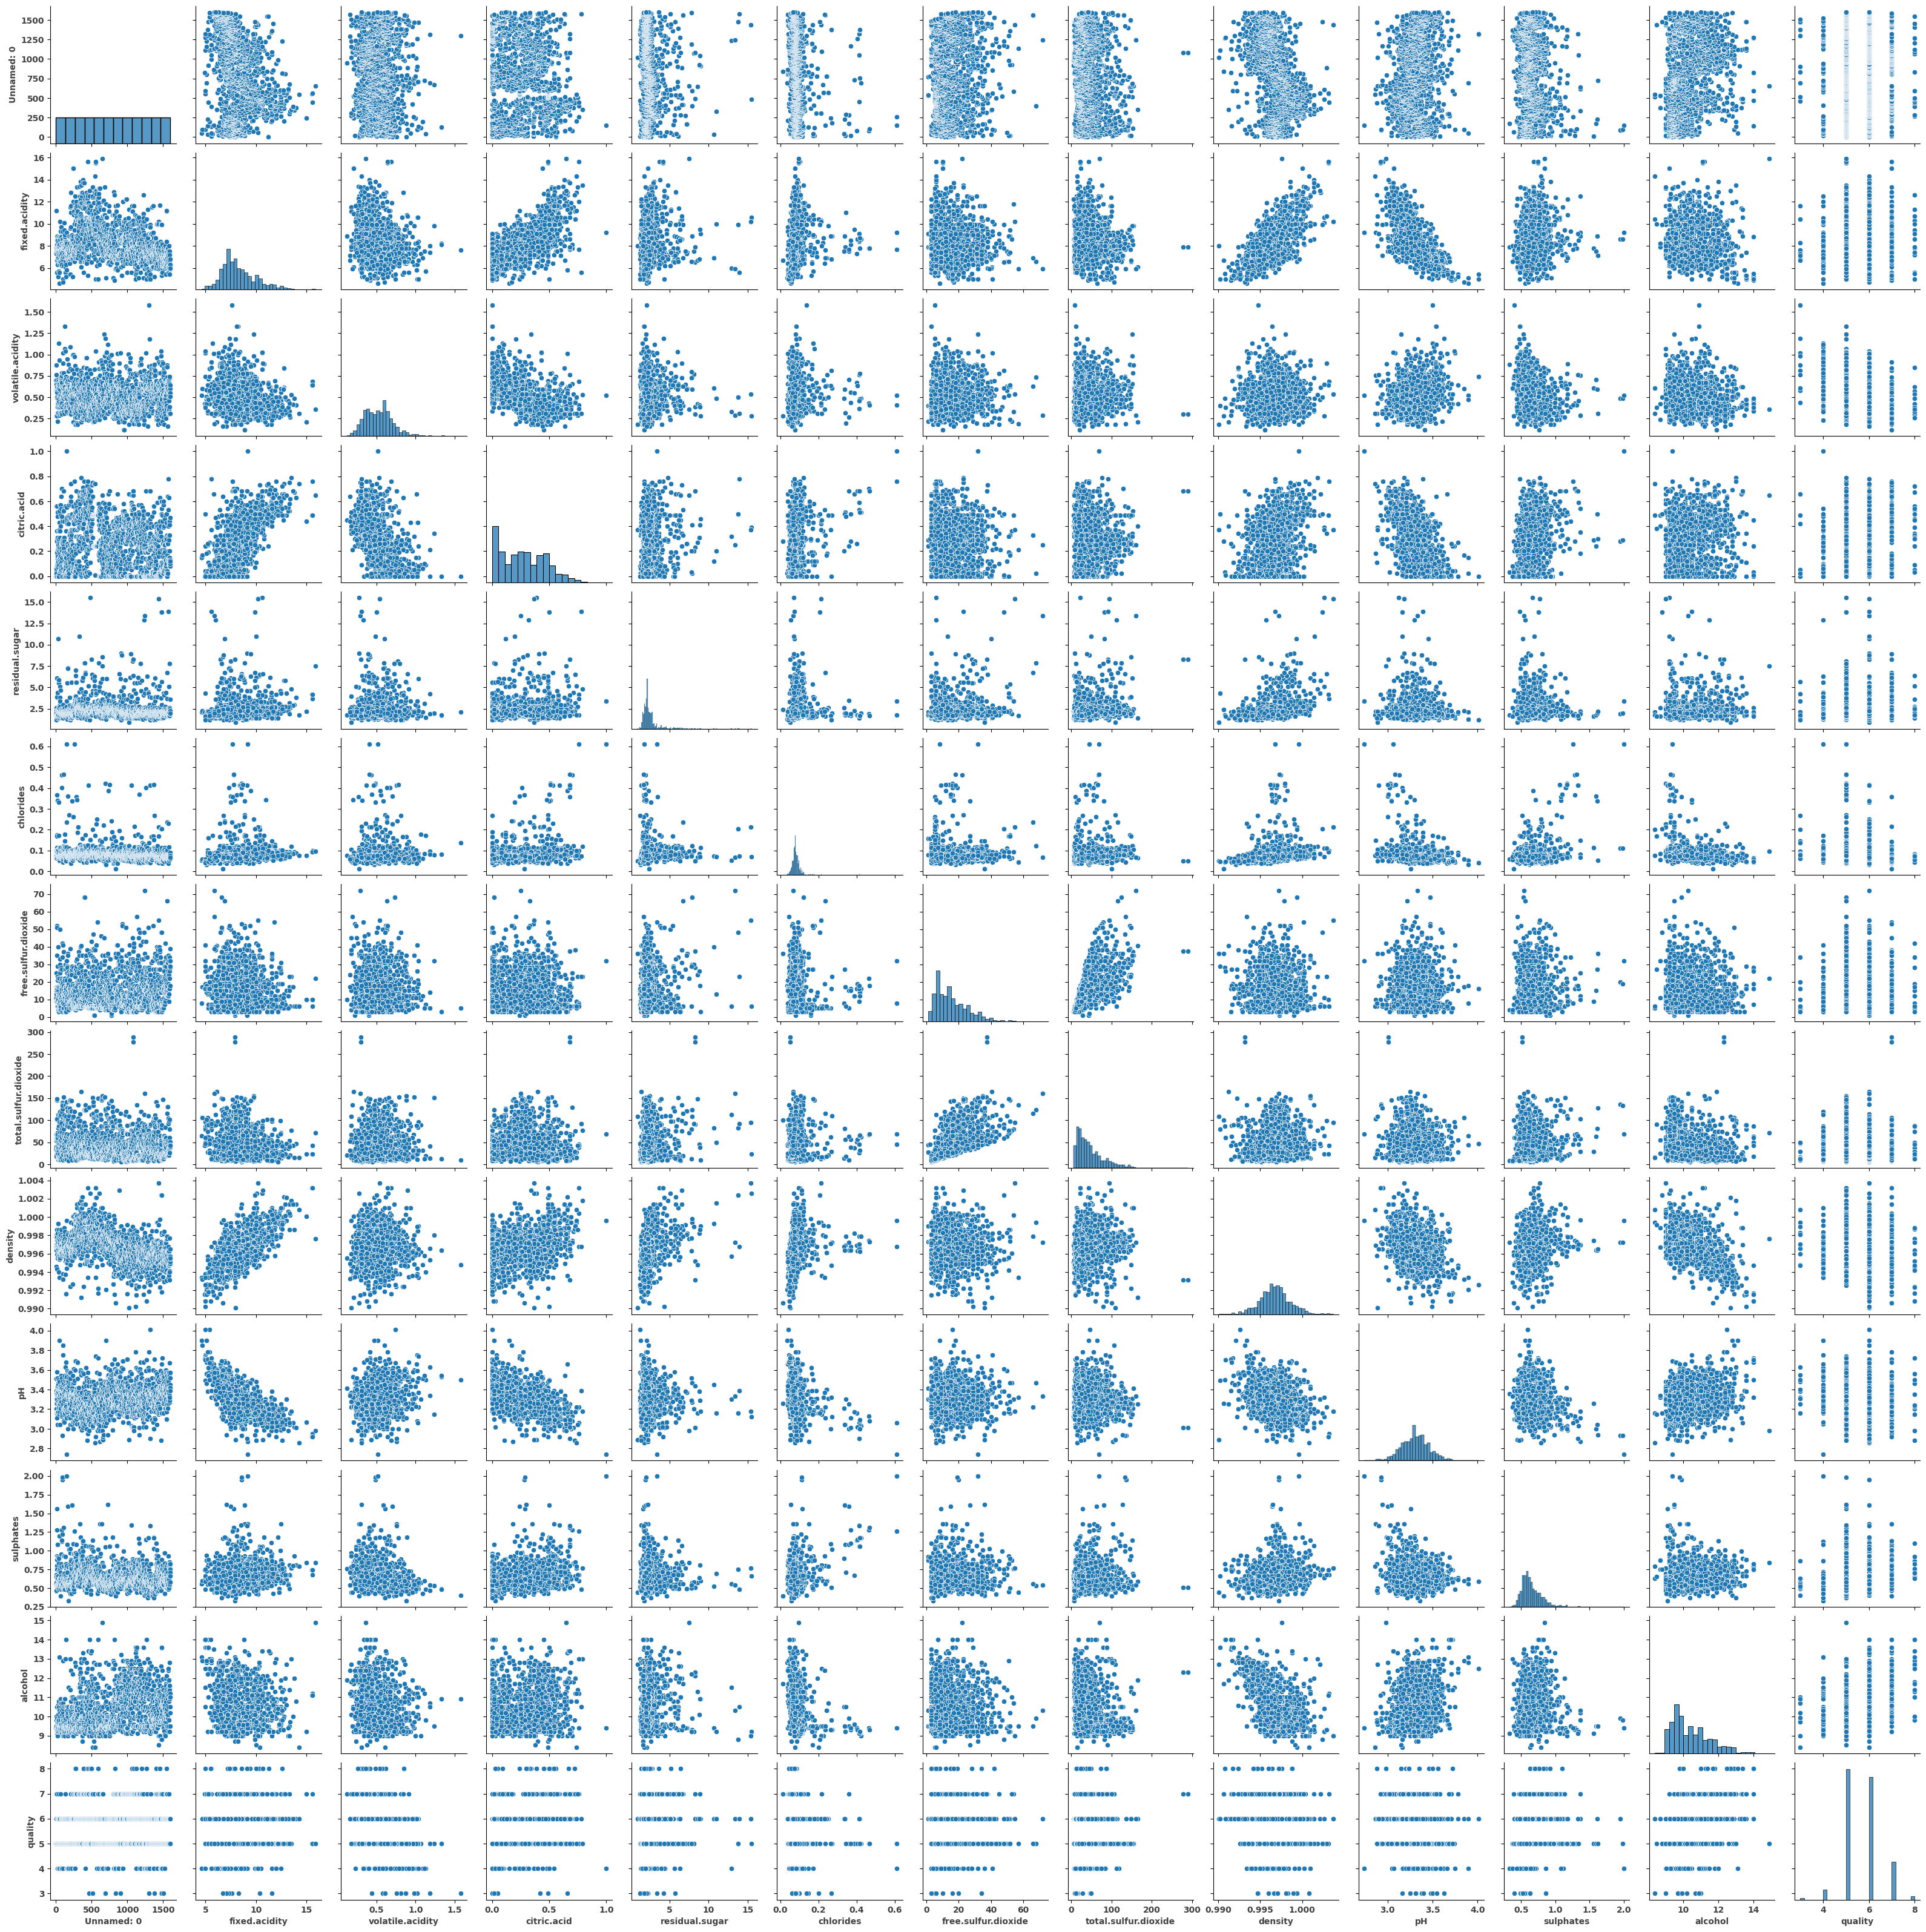

In [12]:
# Make a pairplot of the wine data
sns.pairplot(data=data)
plt.show()

If you've never executed your own Seaborn pairplot before, just take a moment to look at the output. They certainly output a lot of information at once. What can you infer from it? What can you *not* justifiably infer from it?

... All done? 

Here's a couple things you might have noticed: 
- a given cell value represents the correlation that exists between two variables 
- on the diagonal, you can see a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method instead makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.  
- the plots for the quality variable form horizontal bands, due to the fact that it's a discrete variable. We were certainly right in not pursuing a regression analysis of this variable.
- Notice that some of the nice plots invite a line of best fit, such as alcohol vs density. Others, such as citric acid vs alcohol, are more inscrutable.

So we now have called the .corr() method, and the .pairplot() Seaborn method, on our wine data. Both have flaws. Happily, we can get the best of both worlds with a heatmap. 

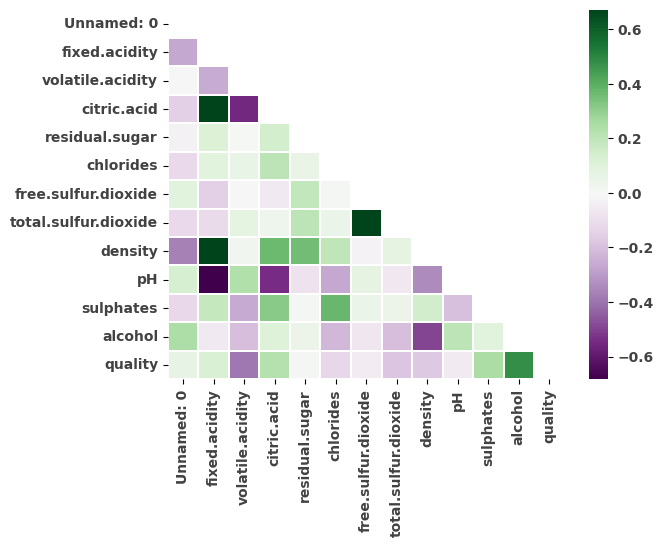

In [13]:
# Make a heatmap of the data 
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='PRGn',linewidths=0.1, linecolor='w')
plt.show()

Take a moment to think about the following questions:
- How does color relate to extent of correlation?
- How might we use the plot to show us interesting relationships worth investigating? 
- More precisely, what does the heatmap show us about the fixed acidity variable's relationship to the density variable? 

There is a relatively strong correlation between the density and fixed acidity variables respectively. In the next code block, call the scatterplot() method on our sns object. Make the x-axis parameter 'density', the y-axis parameter 'fixed.acidity', and the third parameter specify our wine dataset.  

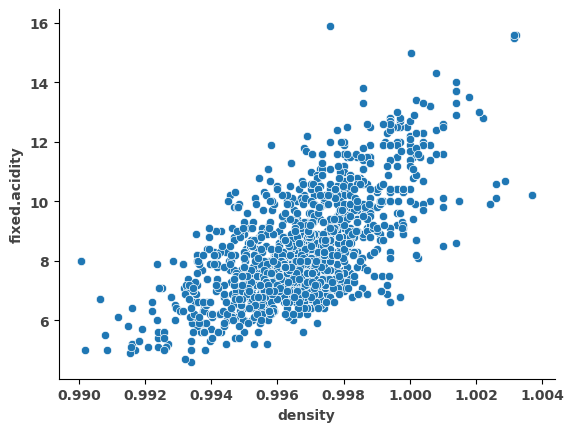

In [14]:
# Plot density against fixed.acidity
sns.scatterplot(data=data, x='density', y='fixed.acidity')
plt.show()

We can see a positive correlation, and quite a steep one. There are some outliers, but as a whole, there is a steep looking line that looks like it ought to be drawn. 

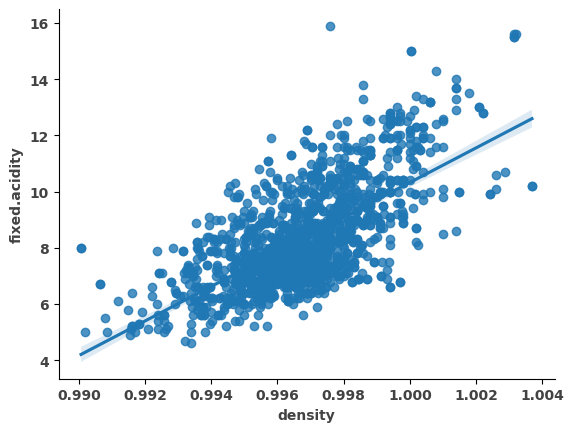

In [15]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
sns.regplot(data=data, x='density', y='fixed.acidity')
plt.show()

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. 

Let's see if we can predict fixed acidity based on density using linear regression. 

### 3. Modeling 

#### 3a. Train/Test Split
While this dataset is super clean, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

You'll recall from p.158 of *AoS* that such a split is important good practice when evaluating statistical models. On p.158, Professor Spiegelhalter was evaluating a classification tree, but the same applies when we're doing regression. Normally, we train with 75% of the data and test on the remaining 25%. 

To be sure, for our first model, we're only going to focus on two variables: fixed acidity as our dependent variable, and density as our sole independent predictor variable. 

We'll be using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) here. Don't worry if not all of the syntax makes sense; just follow the rationale for what we're doing. 

In [16]:
# Subsetting our data into our dependent and independent variables.
dep_var = data['fixed.acidity']
indep_var = data[['density']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(indep_var, dep_var, test_size=0.25, shuffle=True, random_state=88)

In [17]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(f"{X_train.shape=},{X_test.shape=}, {y_train.shape=}, {y_test.shape=} ")

X_train.shape=(1199, 1),X_test.shape=(400, 1), y_train.shape=(1199,), y_test.shape=(400,) 


#### 3b. Making a Linear Regression model: our first model
Sklearn has a [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function built into the linear_model module. We'll be using that to make our regression model. 

In [18]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression()
rModel.fit(X_train, y_train)

LinearRegression()

In [19]:
# We now want to train the model on our test data.
rModel.score(X_train, y_train)

0.43810146362731617

In [20]:
# Evaluate the model  
rModel.score(X_test, y_test)

0.4713116060363436

The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 45% of the variation from the mean. There's more work to do!

In [21]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

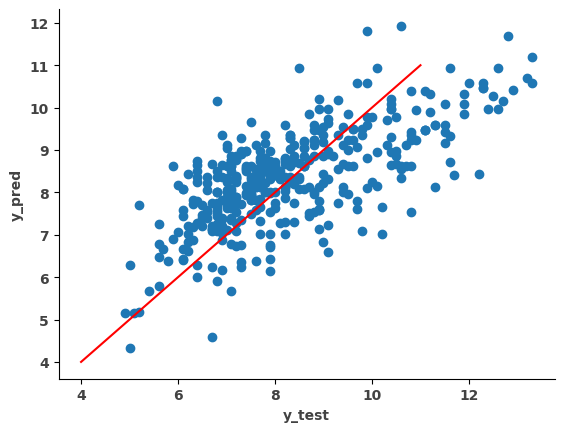

In [22]:
# Let's plot the predictions against the actual result. Use scatter()
x = np.arange(4, 12)
plt.plot(x, x, color='r')
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual fixed acidity, and along the y-axis we have the predicted value for the fixed acidity.

There is a visible positive correlation, as the model has not been totally unsuccesful, but it's clear that it is not maximally accurate: wines with an actual fixed acidity of just over 10 have been predicted as having acidity levels from about 6.3 to 13.

Let's build a similar model using a different package, to see if we get a better result that way.

#### 3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [23]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X = indep_var
Y = dep_var

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
# Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
X = sm.add_constant(X)

In [24]:
# The rest of the preparation is as before.
# _ _ _

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=88)

In [25]:
# Create the model
model_2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
results_2 = model_2.fit()

In [26]:
# Evaluate the model with .summary()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     933.3
Date:                Fri, 09 Jun 2023   Prob (F-statistic):          5.15e-152
Time:                        19:29:25   Log-Likelihood:                -2027.5
No. Observations:                1199   AIC:                             4059.
Df Residuals:                    1197   BIC:                             4069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -602.9289     20.009    -30.133      0.000    -642.185    -563.673
density      613.2615     20.074     30.550      0.000     573.877     652.646
==============================================================================
Omnibus:                       92.901   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.617
Skew:                           0.679   Prob(JB):                     2.88e-26
Kurtosis:                       3.716   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One of the great things about Statsmodels (sm) is that you get so much information from the summary() method. 

There are lots of values here, whose meanings you can explore at your leisure, but here's one of the most important: the R-squared score is 0.455, the same as what it was with the previous model. This makes perfect sense, right? It's the same value as the score from sklearn, because they've both used the same algorithm on the same data.

Here's a useful link you can check out if you have the time: https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [27]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = model_2.predict(results_2.params, X_test)

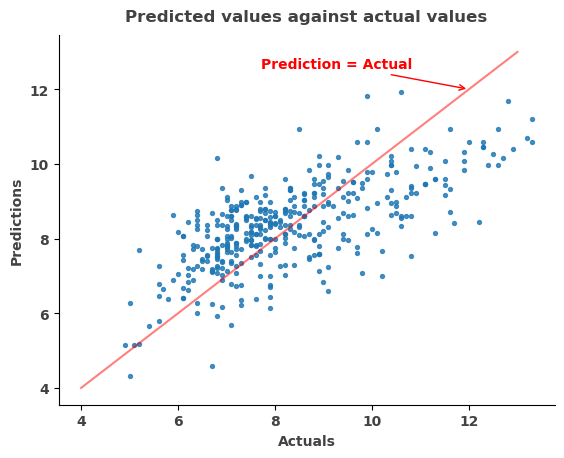

In [28]:
# Plot the predictions
# Build a scatterplot
def plot_actuals_predictions(actuals, predictions):
    plt.clf()

    
    plt.scatter(actuals, predictions, alpha=0.8, s=8)

    # Add a line for perfect correlation. Can you see what this line is doing? Use plot()
    x = np.arange(4, 14)
    plt.plot(x, x, color='r', alpha=0.5)


    # Label it nicely
    plt.annotate(
        text="Prediction = Actual",
        xy=(12, 12),
        xytext=(-150, 15),
        textcoords="offset points",
        arrowprops=dict(color='red',arrowstyle="->"),
        color='r'
    )
    plt.xlabel('Actuals')
    plt.ylabel('Predictions')
    plt.title('Predicted values against actual values')
    plt.show()

plot_actuals_predictions(y_test, y_pred)    



The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all; we still have more work to do. 

To get a better predictive model, we should use more than one variable.

#### 3d. Making a Linear Regression model: our third model: multiple linear regression
Remember, as Professor Spiegelhalter explains on p.132 of *AoS*, including more than one explanatory variable into a linear regression analysis is known as ***multiple linear regression***. 

In [29]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
X = data.copy()
X = X.drop(columns=['quality'])
Y = X.pop('fixed.acidity')
# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=88)

In [30]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
model_3 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
results_3 = model_3.fit()

In [31]:
# Evaluate the model
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     726.4
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:29:25   Log-Likelihood:                -1146.8
No. Observations:                1199   AIC:                             2318.
Df Residuals:                    1187   BIC:                             2379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -616.1680     15.707    -39.230      0.000    -646.984    -585.352
Unnamed: 0              -0.0002   4.43e-05     -4.845      0.000      -0.000      -0.000
volatile.acidity         0.1909      0.138      1.387      0.166      -0.079       0.461
citric.acid              1.6891      0.161     10.489      0.000       1.373       2.005
residual.sugar          -0.2428      0.016    -15.292      0.000      -0.274      -0.212
chlorides               -4.0760      0.465     -8.769      0.000      -4.988      -3.164
free.sulfur.dioxide      0.0095      0.002      3.811      0.000       0.005       0.014
total.sulfur.dioxide    -0.0069      0.001     -8.175      0.000      -0.009      -0.005
density                639.6877     15.661     40.846      0.000     608.961     670.414
pH                      -5.3930      0.149    -36.167      0.000      -5.686      -5.100
sulphates               -0.5998      0.134     -4.463      0.000      -0.864      -0.336
alcohol                  0.5647      0.025     22.536      0.000       0.515       0.614
==============================================================================
Omnibus:                      137.380   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.192
Skew:                           0.521   Prob(JB):                    1.32e-107
Kurtosis:                       5.961   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score shows a big improvement - our first model predicted only around 45% of the variation, but now we are predicting 87%!

In [32]:
# Use our new model to make predictions
y_pred = model_3.predict(results_3.params, X_test)

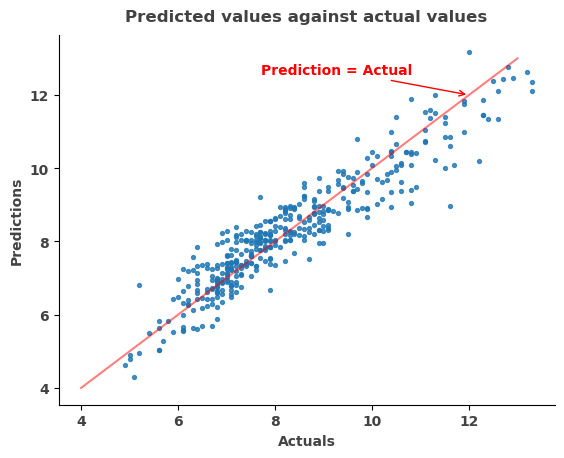

In [33]:
plot_actuals_predictions(y_test, y_pred)

In [34]:
# Plot the predictions
# Build a scatterplot
# _ _ _

# Add a line for perfect correlation
# _ _ _

# Label it nicely
# _ _ _

We've now got a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the red line. 

We can check another metric as well - the RMSE (Root Mean Squared Error). The MSE is defined by Professor Spiegelhalter on p.393 of *AoS*, and the RMSE is just the square root of that value. This is a measure of the accuracy of a regression model. Very simply put, it's formed by finding the average difference between predictions and actual values. Check out p. 163 of *AoS* for a reminder of how this works. 

In [35]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
def get_rmse(actuals, predictions):
    error = predictions - actuals
    rmse = np.sqrt(np.mean(np.square(error)))
    return rmse

rms_error_3 = get_rmse(y_test, y_pred)
print(f"RMSE: {rms_error_3:.4f}")

RMSE: 0.5929


In [36]:
# Get predictions from rModel3


# Put the predictions & actual values into a dataframe
pd.DataFrame(dict(actuals= y_test.values, predicted = y_pred))


actuals  predicted
0        7.8   8.232902
1        6.6   6.713978
2        8.0   7.360337
3        8.5   8.188480
4        7.6   7.330741
..       ...        ...
395      7.6   8.033887
396      8.6   9.241447
397      7.3   7.122146
398      6.5   7.346836
399      6.6   7.262895

[400 rows x 2 columns]

The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away from the correct answer. That's not bad at all.

#### 3e. Making a Linear Regression model: our fourth model: avoiding redundancy 

We can also see from our early heat map that volatile.acidity and citric.acid are both correlated with pH. We can make a model that ignores those two variables and just uses pH, in an attempt to remove redundancy from our model.

In [37]:
# Create test and train datasets
# Include the remaining six columns as predictors
X = data.copy()
# also dropped the unnamed:0 index column
X = X.drop(columns=['quality', 'volatile.acidity', 'citric.acid', 'Unnamed: 0'])
Y = X.pop('fixed.acidity')


# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=88)

In [38]:
# Create the fifth model
model_4 = sm.OLS(y_train, X_train)


# Fit the model
results_4 = model_4.fit()

# Evaluate the model
print(results_4.summary())


                            OLS Regression Results                            
Dep. Variable:          fixed.acidity   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     860.8
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:29:25   Log-Likelihood:                -1225.0
No. Observations:                1199   AIC:                             2468.
Df Residuals:                    1190   BIC:                             2514.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -705.2268 

In [39]:

y_pred = model_4.predict(results_4.params, X_test)

rms_error = get_rmse(y_test, y_pred)
print(f"\nRMSE: {rms_error:.4f}")


RMSE: 0.6705


The R-squared score has reduced, showing us that actually, the removed columns were important.

### Conclusions & next steps

Congratulations on getting through this implementation of regression and good data science practice in Python! 

Take a moment to reflect on which model was the best, before reading on.

.
.
.

Here's one conclusion that seems right. While our most predictively powerful model was rModel3, this model had explanatory variables that were correlated with one another, which made some redundancy. Our most elegant and economical model was rModel4 - it used just a few predictors to get a good result. 

All of our models in this notebook have used the OLS algorithm - Ordinary Least Squares. There are many other regression algorithms, and if you have time, it would be good to investigate them. You can find some examples [here](https://www.statsmodels.org/dev/examples/index.html#regression). Be sure to make a note of what you find, and chat through it with your mentor at your next call.
